In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv(r"C:\Users\User\Downloads\CarPrice_Assignment - CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [44]:
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [45]:
df.drop(columns = ['car_ID', 'symboling', 'CarName'], inplace = True)

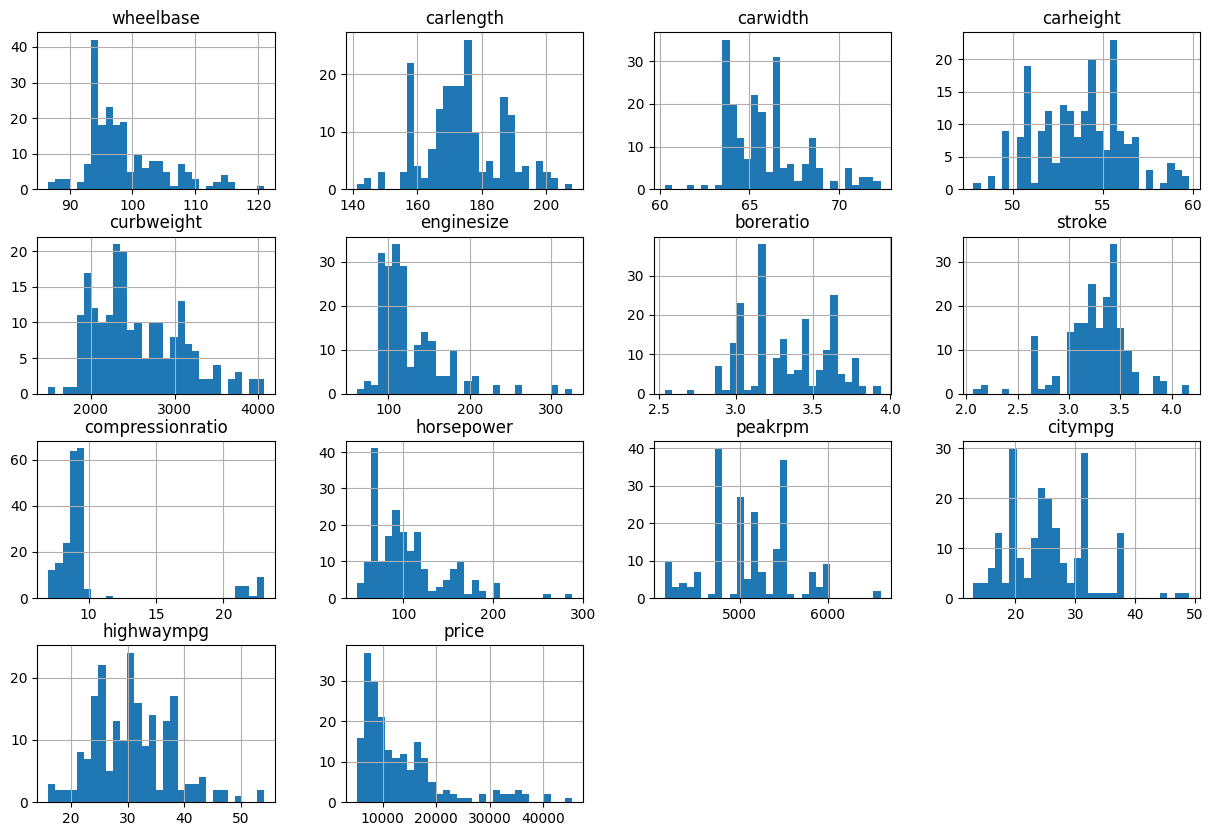

In [46]:
df.hist(bins=30,figsize=(15,10))    #bins = qty of histogram bar
plt.show()

In [47]:
cols = df.columns.tolist()
print(cols)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


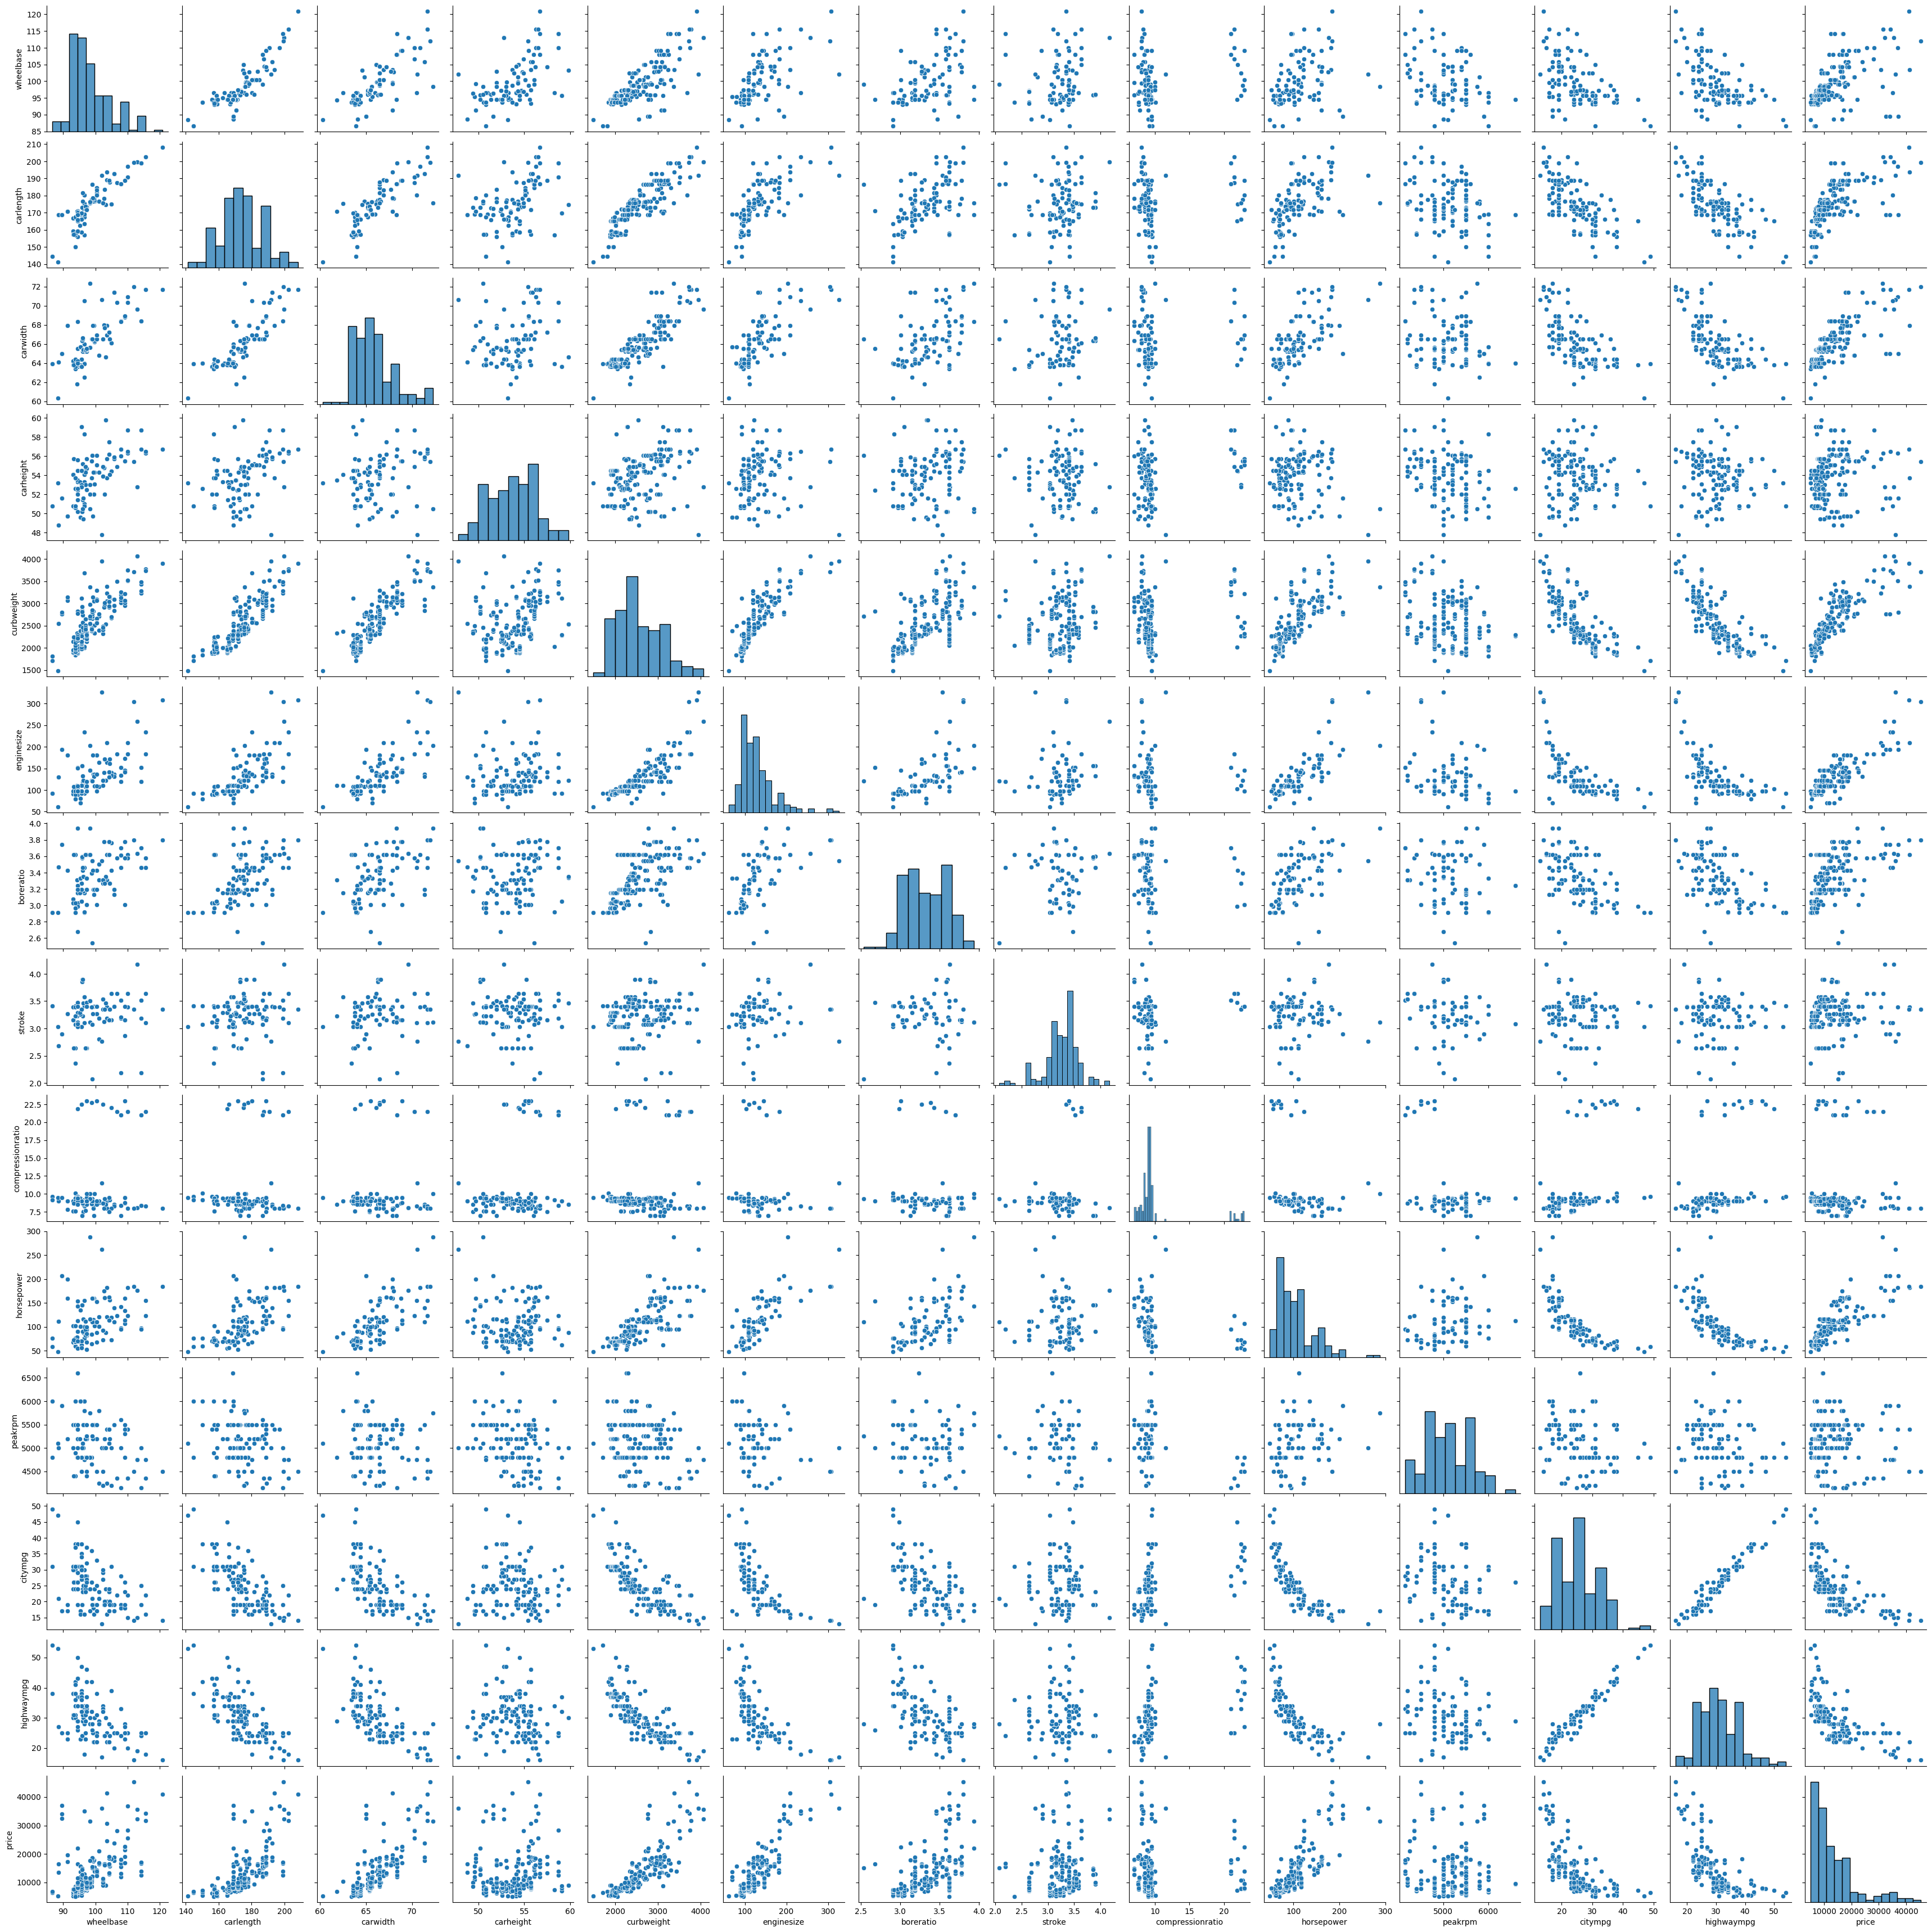

In [49]:
sns.pairplot(df[[ 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']])

In [118]:
replacements = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two' : 2, 'twelve' : 12, 'three' : 3}
df['cylindernumber'] = df['cylindernumber'].replace(replacements)

In [119]:
df['doornumber'] = df['doornumber'].replace(replacements)

In [106]:
# df.select_dtypes(include=[np.number]).corr()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
doornumber,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.011082,0.160959,0.129533,0.182942,-0.055307,0.168790,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [111]:
# numerical_cols = df.select_dtypes(include=[np.number])

# # Calculate correlation matrix
# corr_matrix = numerical_cols.corr()

# # Select highly correlated features with 'price'
# highly_correlated_features = corr_matrix['price'][
#     (corr_matrix['price'].abs() > 0.4) & 
#     (corr_matrix['price'] != 1)
# ].index.tolist()

# # Find the intersection of numerical columns and highly correlated features
# selected_cols = list(set(numerical_cols) & set(highly_correlated_features))

In [112]:
# selected_cols

['boreratio',
 'carlength',
 'highwaympg',
 'citympg',
 'curbweight',
 'cylindernumber',
 'horsepower',
 'wheelbase',
 'carwidth',
 'enginesize']

In [120]:
x = df.drop('price',axis = 1)                                                     #axis y:0, x:1
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)   

In [93]:
x

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,...,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,...,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,...,6,145,idi,3.01,3.40,23.0,106,4800,26,27


In [121]:
df_no_price = df.drop('price', axis=1) 
num_features = df_no_price.select_dtypes(include=[np.number]).columns.tolist()    # for scaler  
# num_features = selected_cols
cat_features = df.select_dtypes(include=[np.object_]).columns.tolist()  

In [127]:
num_features

['doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [128]:
cat_features

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [122]:
df_no_price.select_dtypes(include=[np.number])


,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28
201,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25
202,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23
203,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27


In [86]:
# df.select_dtypes(include=[np.object_])

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,std,convertible,rwd,front,dohc,mpfi
1,gas,std,convertible,rwd,front,dohc,mpfi
2,gas,std,hatchback,rwd,front,ohcv,mpfi
3,gas,std,sedan,fwd,front,ohc,mpfi
4,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,mpfi
201,gas,turbo,sedan,rwd,front,ohc,mpfi
202,gas,std,sedan,rwd,front,ohcv,mpfi
203,diesel,turbo,sedan,rwd,front,ohc,idi


In [78]:
# df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [79]:
# df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# (1)
num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='mean')),               #read more with imputer median things
    ('scaler',StandardScaler())
])

# (2)
cat_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# (1)+(2)
preprocessor = ColumnTransformer(
    transformers= [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [124]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [57]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem'])])),
                ('regressor', LinearRegression())])

In [125]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [126]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print(f'Mean Squared Error: {mse:.2f}')
# print(f'R^2 Score: {r2:.2f}')
# print(f'Root Mean Squared Error: {rmse:.2f}')

print(f'R2 = {r2:.2f}, MSE = {mse:.2f}, RMSE = +- {rmse:.2f}')

R2 = 0.93, MSE = 3411122.17, RMSE = +- 1846.92


In [129]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)
# print(f'Mean Squared Error: {mse:.2f}')
# print(f'R^2 Score: {r2:.2f}')
# print(f'Root Mean Squared Error: {rmse:.2f}')

print(f'R2 = {r2:.2f}, MSE = {mse:.2f}, RMSE = +- {rmse:.2f}')

R2 = 0.92, MSE = 5321523.94, RMSE = +- 2306.84
